In [1]:
# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2025-09-30 07:12:38--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-09-30 07:12:38 (96.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



10% of Food Data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-30 07:12:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 74.125.24.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.0MB/s    in 8.3s    

2025-09-30 07:12:52 (19.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
walk_through_dir('/content/10_food_classes_10_percent')

The error `NameError: name 'unzip_data' is not defined` occurred because the cell that imports the function was not executed before the cell that uses it.

Since the file was already downloaded and unzipped in the previous run, I'll remove the unzip command from the cell.

In [4]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [5]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [6]:
import tensorflow as tf
IMG_SIZE = (224, 224)
batch_size = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size = batch_size)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[107.46796     72.182236    58.896523  ]
   [105.25351     70.324936    54.68208   ]
   [110.283325    75.21875     55.14971   ]
   ...
   [ 85.65415     63.297005    49.93986   ]
   [ 86.94116     63.298306    50.584023  ]
   [ 86.74027     62.70757     50.123234  ]]

  [[120.55214     79.69499     59.90928   ]
   [119.46684     81.53827     60.68112   ]
   [115.10969     79.73565     58.07908   ]
   ...
   [ 77.55084     57.407986    46.407986  ]
   [ 78.67699     58.364162    47.364162  ]
   [ 81.04544     59.045437    48.045437  ]]

  [[115.72114     75.792564    53.792572  ]
   [107.89732     71.78715     52.55182   ]
   [102.2441      70.74697     52.14206   ]
   ...
   [ 87.495575    62.852715    52.638428  ]
   [ 86.85715     62.214287    52.        ]
   [ 87.22101     62.500175    52.285892  ]]

  ...

  [[229.76584    231.55157    217.12305   ]
   [234.69421    236.2853     224.888     ]
   [232.31847    232.82008    224.89522   ]
   ...
   [208.87218    208.268

In [10]:
# create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# freeze the base model
base_model.trainable = False

# create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# pass the inputs into the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalizer)
x = base_model(inputs)
# check data shape after passing it to base model
print(f'Shape after base_model: {x.shape}')

# average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D(): {x.shape}')

# create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# combine the inputs with the outputs into a mode
model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data_10_percent,
                                 validation_steps = int(0.25* len(test_data_10_percent)),
                                 callbacks = [create_tensorboard_callback('transfer_learning', '10_percent_feature_extract')])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250930-071310
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2659 - loss: 2.0921 - val_accuracy: 0.6875 - val_loss: 1.3238
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.7202 - loss: 1.2407 - val_accuracy: 0.7895 - val_loss: 0.9080
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.7983 - loss: 0.9057 - val_accuracy: 0.8372 - val_loss: 0.7240
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8274 - loss: 0.7273 - val_accuracy: 0.8438 - val_loss: 0.6504
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8837 - loss: 0.6124 - val_accuracy: 0.8470 - val_loss: 0.5937


In [11]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, '|', layer.name)

0 | input_layer
1 | rescaling
2 | normalization
3 | stem_conv
4 | stem_bn
5 | stem_activation
6 | block1a_project_conv
7 | block1a_project_bn
8 | block1a_project_activation
9 | block2a_expand_conv
10 | block2a_expand_bn
11 | block2a_expand_activation
12 | block2a_project_conv
13 | block2a_project_bn
14 | block2b_expand_conv
15 | block2b_expand_bn
16 | block2b_expand_activation
17 | block2b_project_conv
18 | block2b_project_bn
19 | block2b_drop
20 | block2b_add
21 | block3a_expand_conv
22 | block3a_expand_bn
23 | block3a_expand_activation
24 | block3a_project_conv
25 | block3a_project_bn
26 | block3b_expand_conv
27 | block3b_expand_bn
28 | block3b_expand_activation
29 | block3b_project_conv
30 | block3b_project_bn
31 | block3b_drop
32 | block3b_add
33 | block4a_expand_conv
34 | block4a_expand_bn
35 | block4a_expand_activation
36 | block4a_dwconv2
37 | block4a_bn
38 | block4a_activation
39 | block4a_se_squeeze
40 | block4a_se_reshape
41 | block4a_se_reduce
42 | block4a_se_expand
43 | blo

In [12]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [13]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

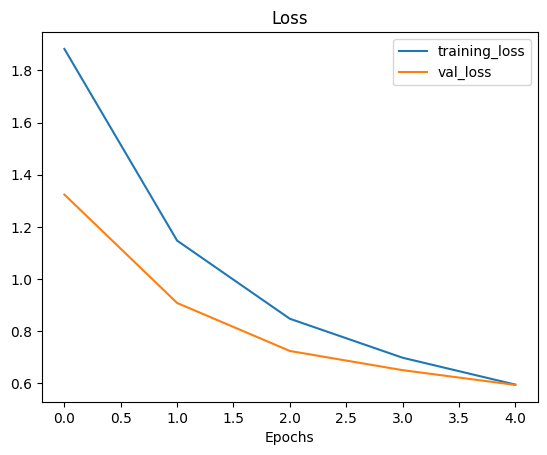

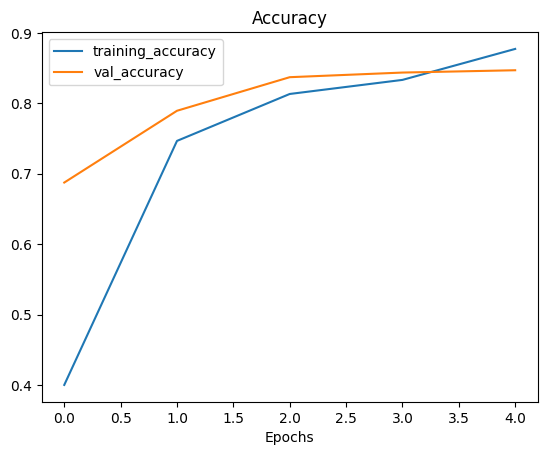

In [14]:
plot_loss_curves(history_10_percent)

In [15]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor} \n')

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random tensor:\n {global_average_pooled_tensor} \n')

# Check the shapes of the different tensors
print(f'Shape of input tensor:{input_tensor.shape}')
print(f'Shape of 2D global averaged pooled input tensor:{global_average_pooled_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor:(1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor:(1, 3)


In [16]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2])     # average across the moddle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

Running a series of transfer learning experiments

In [17]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2025-09-30 07:24:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.6MB/s    in 6.8s    

2025-09-30 07:25:06 (18.7 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hambur

In [19]:
import tensorflow as tf
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode='categorical',
                                                                          image_size=(224, 224),
                                                                          batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size  = IMG_SIZE,
                                                                batch_size=32) # Add batch_size here

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')

(np.float64(-0.5), np.float64(454.5), np.float64(360.5), np.float64(-0.5))

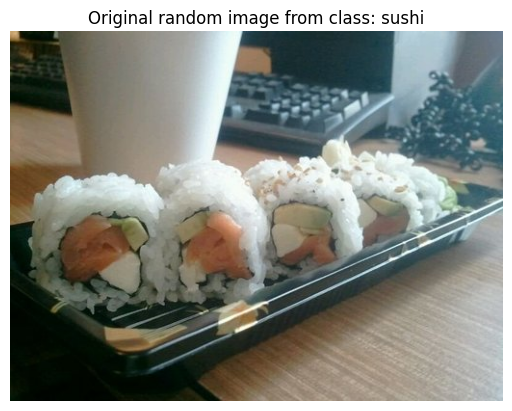

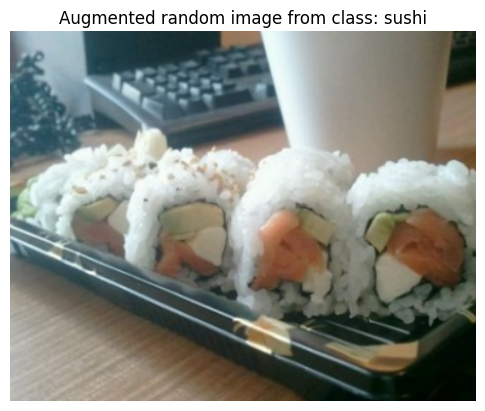

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = '/content/10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

#augmented the image

augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img/255.))
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)

In [22]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')

input_shape=(224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=input_shape)
base_model.trainable = False


inputs = layers.Input(shape=input_shape, name='input_layer')


x = data_augmentation(inputs)


x = base_model(x, training=False)


x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)


outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)


model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250930-072511
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.0787 - loss: 2.4327 - val_accuracy: 0.1562 - val_loss: 2.3004
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 819ms/step - accuracy: 0.1496 - loss: 2.2590 - val_accuracy: 0.2056 - val_loss: 2.1996
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2230 - loss: 2.0879 - val_accuracy: 0.2763 - val_loss: 2.0921
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 820ms/step - accuracy: 0.3153 - loss: 1.9537 - val_accuracy: 0.3602 - val_loss: 1.9887
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step - accuracy: 0.5000 - loss: 1.7832 - val_accuracy: 0.4013 - val_loss: 1.9132


In [23]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3908 - loss: 1.9206


[1.9314711093902588, 0.38839998841285706]

Model 2: Feature extraction transfer learning with 10 percent of data and data augmentation

In [24]:
train_dir_10 = '/content/10_food_classes_10_percent/train/'
test_dir_10 = '/content/10_food_classes_10_percent/test/'
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10,
                                                                            batch_size=batch_size,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=(224, 224, 3))
base_model_2.trainable = False

In [26]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')


In [27]:
inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

x = data_augmentation(inputs)

x = base_model_2(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2_augmented = keras.Model(inputs, outputs)

model_2_augmented.compile(loss='categorical_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

model_2_augmented.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data_10_percent) # Removed validation_steps

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 647ms/step - accuracy: 0.1823 - loss: 2.2565 - val_accuracy: 0.6204 - val_loss: 1.5779
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - accuracy: 0.5954 - loss: 1.5661 - val_accuracy: 0.7536 - val_loss: 1.1204
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.6716 - loss: 1.2286 - val_accuracy: 0.7792 - val_loss: 0.8938
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step - accuracy: 0.7588 - loss: 1.0278 - val_accuracy: 0.7948 - val_loss: 0.7799
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 508ms/step - accuracy: 0.7510 - loss: 0.9012 - val_accuracy: 0.8156 - val_loss: 0.6966


In [28]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=10,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:


    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training


    inputs = layers.Input(shape=input_shape, name = 'input_layer')
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax', name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)


    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model


model_2 = create_base_model(input_shape=(*IMG_SIZE, 3))


Creating a ModelCheckpoint callback

In [29]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.weights.h5'


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

In [30]:
train_data_10_percent.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [31]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [32]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name = 'data_augmentation')

In [33]:
initial_epochs = 5

history_10_percent_data_augmented = model_2.fit(train_data_10_percent,
                                                 epochs=initial_epochs,
                                                validation_data = test_data_10_percent,
                                                callbacks = [checkpoint_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.1670 - loss: 2.2801
Epoch 1: val_loss improved from inf to 1.56433, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 635ms/step - accuracy: 0.1717 - loss: 2.2718 - val_accuracy: 0.6320 - val_loss: 1.5643
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.5595 - loss: 1.6007
Epoch 2: val_loss improved from 1.56433 to 1.12667, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 534ms/step - accuracy: 0.5615 - loss: 1.5961 - val_accuracy: 0.7512 - val_loss: 1.1267
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.6993 - loss: 1.2168
Epoch 3: val_loss improved from 1.12667 to 0.89408, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - accuracy: 0.6994 - loss: 1.2155 - val_accuracy: 0.7980 - val_loss: 0.8941
Epoch 4/5
2

In [34]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8278 - loss: 0.6723


[0.6872078776359558, 0.824400007724762]

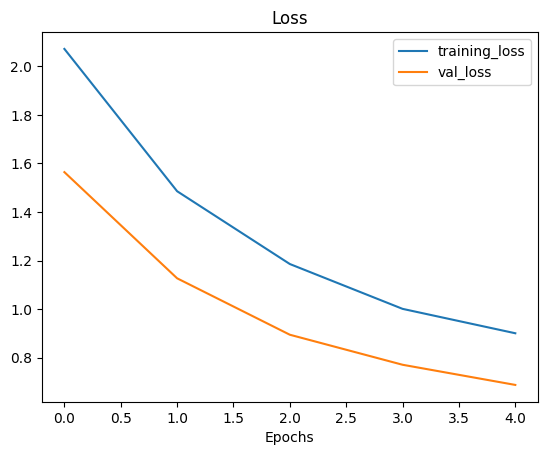

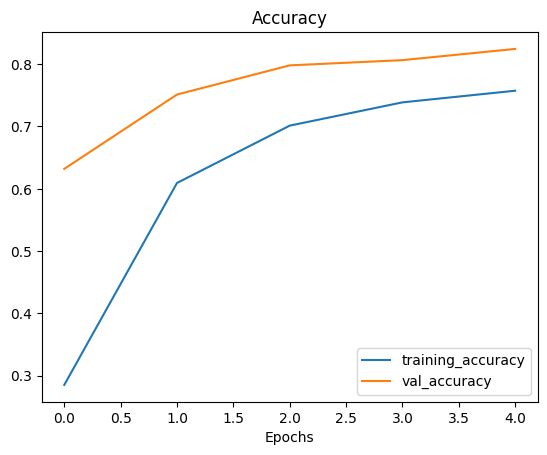

In [35]:
plot_loss_curves(history_10_percent_data_augmented)

In [36]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_result = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8316 - loss: 0.6736


In [37]:
results_10_percent_data_aug == loaded_weights_model_result

True

In [38]:
import numpy as np

np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_result))

array([ True,  True])

Model 3: Fine-tuning an existing model on 10% of the data

In [39]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [40]:
for layer in model_2.layers:
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 269 | Layer name: input_layer | Trainable? True
Layer number: 269 | Layer name: data_augmentation | Trainable? True
Layer number: 269 | Layer name: efficientnetv2-b0 | Trainable? False
Layer number: 269 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 269 | Layer name: output_layer | Trainable? True


In [41]:
model_2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [42]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [43]:
print(len(model_2_base_model.trainable_variables))

0


In [44]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [45]:
model_2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [46]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [47]:
print(len(model_2_base_model.trainable_variables))

0


In [48]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [49]:
model_2_base_model.trainable = True

for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [50]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_6 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [51]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                      epochs = fine_tune_epochs,
                                      validation_data = test_data,
                                      initial_epoch = history_10_percent_data_augmented.epoch[-1],
                                      validation_steps = int(0.25 * len(test_data)))

Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.7528 - loss: 1.0599 - val_accuracy: 0.8438 - val_loss: 0.7126
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.7704 - loss: 0.9635 - val_accuracy: 0.8602 - val_loss: 0.6256
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.7692 - loss: 0.9190 - val_accuracy: 0.8536 - val_loss: 0.6053
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.8070 - loss: 0.7999 - val_accuracy: 0.8487 - val_loss: 0.5628
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.8050 - loss: 0.7741 - val_accuracy: 0.8470 - val_loss: 0.5464
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.8052 - loss: 0.7534 - val_accuracy: 0.8684 - val_loss: 0.4918


In [52]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show();

6
12
[0.7480000257492065, 0.781333327293396, 0.7960000038146973, 0.7946666479110718, 0.8106666803359985, 0.8186666369438171, 0.7480000257492065, 0.781333327293396, 0.7960000038146973, 0.7946666479110718, 0.8106666803359985, 0.8186666369438171]


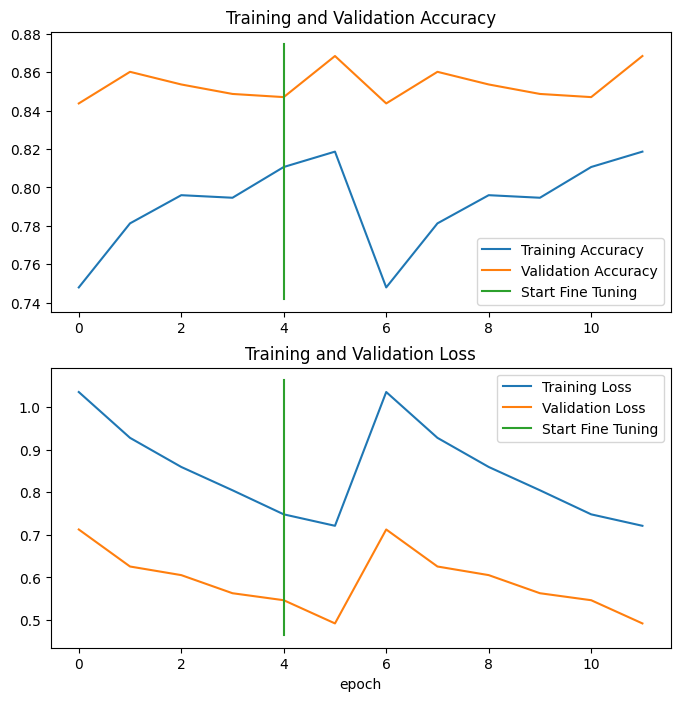

In [53]:
compare_historys(original_history = history_fine_10_percent_data_aug,
                new_history = history_fine_10_percent_data_aug,
                initial_epochs=5)

In [54]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2025-09-30 07:33:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.1MB/s    in 24s     

2025-09-30 07:33:44 (21.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [55]:
walk_through_dir

<function helper_functions.walk_through_dir(dir_path)>

In [56]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='categorical', image_size=IMG_SIZE)

test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='categorical', image_size=IMG_SIZE)



Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [57]:
model_4 = create_base_model(learning_rate = 1e-4)

In [58]:
model_4.load_weights(checkpoint_path)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [59]:
print(len(model_4.trainable_variables))

2


In [60]:
model_4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8326 - loss: 0.6709


[0.6872079372406006, 0.824400007724762]

In [61]:
for layer_number, layer in enumerate(model_4.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [62]:
model_4_base_model = model_4.layers[2]
model_4_base_model.trainable = True

for layer in model_4_base_model.layers[:-10]:
  layer.trainable = False

In [63]:
for layer_number, layer in enumerate(model_4_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_7 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [64]:
[(layer_number, layer.name, layer.trainable)

 for layer_number, layer in enumerate(model_4_base_model.layers)]

[(0, 'input_layer_7', False),
 (1, 'rescaling_4', False),
 (2, 'normalization_4', False),
 (3, 'stem_conv', False),
 (4, 'stem_bn', False),
 (5, 'stem_activation', False),
 (6, 'block1a_project_conv', False),
 (7, 'block1a_project_bn', False),
 (8, 'block1a_project_activation', False),
 (9, 'block2a_expand_conv', False),
 (10, 'block2a_expand_bn', False),
 (11, 'block2a_expand_activation', False),
 (12, 'block2a_project_conv', False),
 (13, 'block2a_project_bn', False),
 (14, 'block2b_expand_conv', False),
 (15, 'block2b_expand_bn', False),
 (16, 'block2b_expand_activation', False),
 (17, 'block2b_project_conv', False),
 (18, 'block2b_project_bn', False),
 (19, 'block2b_drop', False),
 (20, 'block2b_add', False),
 (21, 'block3a_expand_conv', False),
 (22, 'block3a_expand_bn', False),
 (23, 'block3a_expand_activation', False),
 (24, 'block3a_project_conv', False),
 (25, 'block3a_project_bn', False),
 (26, 'block3b_expand_conv', False),
 (27, 'block3b_expand_bn', False),
 (28, 'block3b_e

In [65]:
model_4.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [66]:
fine_tune_epochs = initial_epochs + 5
model_4_history = model_4.fit(train_data_10_classes_full,
                              epochs = fine_tune_epochs,
                              initial_epoch = history_10_percent_data_augmented.epoch[-1],
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)))

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 257ms/step - accuracy: 0.7195 - loss: 1.0218 - val_accuracy: 0.8635 - val_loss: 0.4515
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 74s 224ms/step - accuracy: 0.7904 - loss: 0.7383 - val_accuracy: 0.8997 - val_loss: 0.3322
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 200ms/step - accuracy: 0.8046 - loss: 0.6578 - val_accuracy: 0.9046 - val_loss: 0.3086
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.8145 - loss: 0.6077 - val_accuracy: 0.9112 - val_loss: 0.2764
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.8248 - loss: 0.5602 - val_accuracy: 0.9178 - val_loss: 0.2307
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.8326 - loss: 0.5306 - val_accuracy: 0.9194 - val_loss: 0.2464


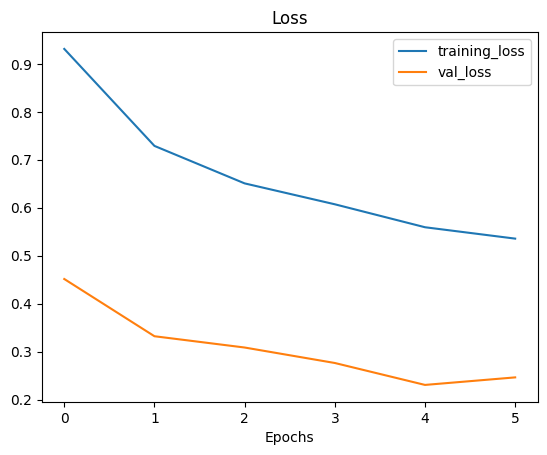

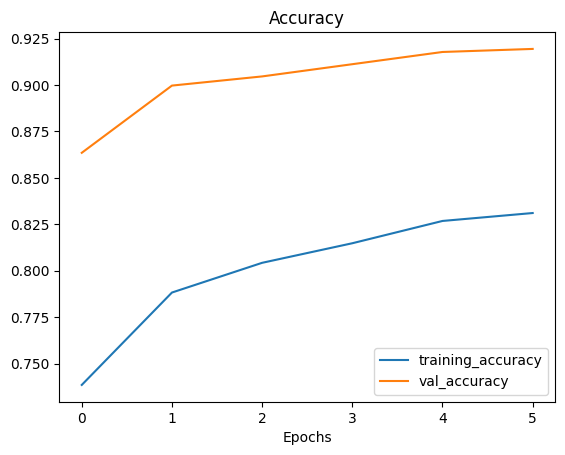

In [67]:
plot_loss_curves(model_4_history)

5
11
[0.2853333353996277, 0.609333336353302, 0.7013333439826965, 0.7386666536331177, 0.7573333382606506, 0.7480000257492065, 0.781333327293396, 0.7960000038146973, 0.7946666479110718, 0.8106666803359985, 0.8186666369438171]


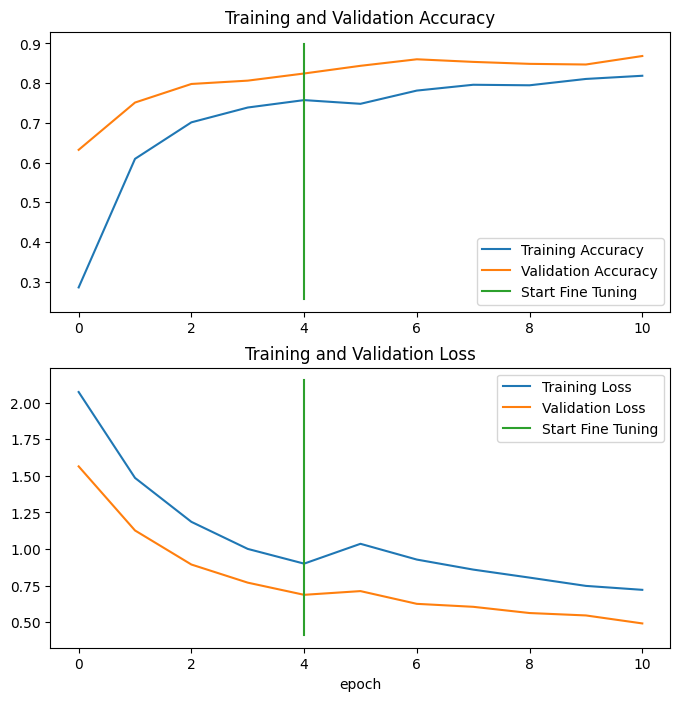

In [68]:
compare_historys(original_history=history_10_percent_data_augmented,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

Model to predict 101 Classes